### 

PLEASE comment/document what each function is doing in your own words to demonstrate your understanding. Of course, push it up to your GitHub on completion.

(SOURCE: https://github.com/jaimeps/adaboost-implementation)

In [7]:
# Pandas as NumPy
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Pyplot
import matplotlib.pyplot as plt

# Load sample breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#
from sklearn.datasets import make_hastie_10_2

In [4]:
# Get Error rate
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

# Print Error rate
def print_error_rate(err):
    print('Error rate: Traininf %.4f - Test: %4.f' % err)
    
# Print Generic Classifer
def generic_clf(y_train, X_train, y_test, X_test, clf):
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, y_train), get_error_rate(pred_test, y_test)

In [5]:
# AdaBoost implementation
def adaboost_clf(y_train, X_train, y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit classifier with weights
        clf.fit(X_train, y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        
        # Indicator function
        # Code below works only if pred_train and y_train are of type np.array
        miss = [int(x) for x in (pred_train_i != y_train)] 
        
        miss2 = [x if x==1 else -1 for x in miss]
        
        err_m = np.dot(w, miss) / sum(w)
        
        alpha_m = .5 * np.log((1 - err_m) / float(err_m))
        
        # Calculate the weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        pred_train = [sum(x) for x in zip(pred_train, [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_train, [x * alpha_m for x in pred_test_i])]
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    return get_error_rate(pred_train, y_train), get_error_rate(pred_test, y_test)

In [6]:
# Plot function
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')


In [8]:
# Build DecisionTree as base model with max_depth=1
tree = DecisionTreeClassifier(max_depth=1, random_state=101)

In [9]:
data = load_breast_cancer()
X = data.data
y = data.target

In [10]:
columns = data.feature_names

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [55]:
# Use hastie dataset
data = make_hastie_10_2()

    # Read data
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y

# Split into training and test set
train, test = train_test_split(df, test_size = 0.2)
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]


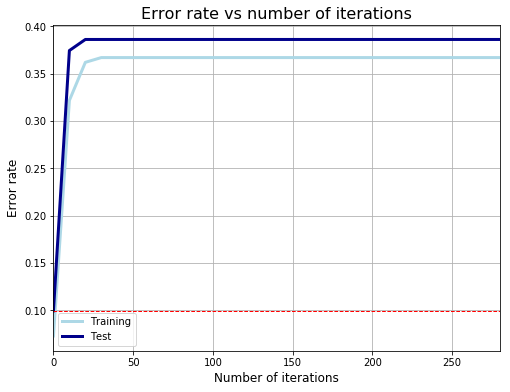

In [15]:
if __name__=='__main__':
    # Fit a simple DecisionTreeClassifier with generic_clf
    er_tree = generic_clf(y_train, X_train, y_test, X_test, tree)

    # Fit Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 150, 5)
    for i in x_range:    
        er_i = adaboost_clf(y_train, X_train, y_test, X_test, i, tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)

The error rate goes up with increasing # of iterations? Something is going wrong here!